<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yellowbrick 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/house_data_processed.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [4]:
house_data.shape

(21613, 16)

In [5]:
target = house_data['price'] # store price in target

features = house_data.drop('price', axis=1) # store all other columns except price in the features dataframe

In [6]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [7]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns) # correlation values range between -1 and 1

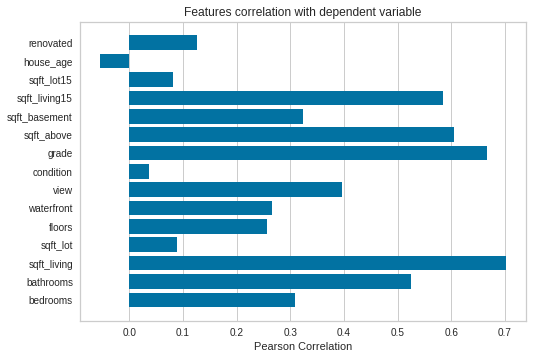

In [8]:
visualizer = FeatureCorrelation(labels = feature_names) # instantiate Feature Correlation object

visualizer.fit(features, target) # find the correlation between all of the features and the target price
visualizer.poof() # all x-variables are positively correlated with price except house age 

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [11]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target) # perform univariate analysis of the relationship between features and target to select the most relevant
# f_regression will calculate the correlation between every x variable and the corresponding y value, and select the 5 most relevant features based on the correlation (k=5)

In [12]:
features_mask = select_univariate.get_support()
features_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [13]:
selected_columns = features.columns[features_mask]
selected_columns # these are the 5 most relevant features

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [14]:
selected_features = features[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [15]:
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [17]:
# standardize the numeric data so that it isn't on different scales as above
from sklearn.preprocessing import scale

X = pd.DataFrame(data=scale(selected_features), columns=selected_features.columns)

y = target

In [18]:
X.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.788439e-16,2.419652e-16,2.524855e-16,1.104624e-16,8.153176e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 80% train, 20% test

In [20]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression() # instantiate Linear Regression object

linear_regression.fit(X_train, y_train) # train the model

LinearRegression()

In [21]:
# use model for prediction
y_pred = linear_regression.predict(X_test)

In [22]:
df = pd.DataFrame({'test': y_test, 'Predicted': y_pred})

df.head()

,test,Predicted
13282,580000.0,357950.263070
198,440000.0,409696.962337
2888,205000.0,386000.218927
12042,513000.0,532142.258007
4360,800000.0,595061.636862


In [23]:
# evaluate our regression model using the r2 score
from sklearn.metrics import r2_score 

score = linear_regression.score(X_train, y_train)
r2score = r2_score(y_test, y_pred)

In [24]:
print('Score: {}'.format(score))
print('r2_score: {}'.format(r2score)) # scores are very close

Score: 0.5463080102530687
r2_score: 0.5360671350803292


In [25]:
linear_regression.coef_

array([-26884.05270665, 226766.86569225, 130352.06586392, -70447.55369128,
        17232.11006608])

In [26]:
linear_regression.intercept_ 

539650.8951131691

Perform multiple regression using analytical techniques

In [27]:
import statsmodels.api as sm

In [28]:
# add constant to training data
X_train = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# perform multiple regression analytically using sm.OLS().fit ordinary least squares 

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_train)

print(model.summary())

# r2 and adjust r2 are very close and the p-value is 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4162.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:52:06   Log-Likelihood:            -2.3917e+05
No. Observations:               17290   AIC:                         4.783e+05
Df Residuals:                   17284   BIC:                         4.784e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.397e+05   1872.342    288.222

In [30]:
linear_regression.intercept_

539650.8951131691

In [31]:
linear_regression.coef_

array([-26884.05270665, 226766.86569225, 130352.06586392, -70447.55369128,
        17232.11006608])

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [37]:
select_univariate = SelectKBest(mutual_info_regression, k=5).fit(features, target)

In [38]:
features_mask = select_univariate.get_support()

features_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [39]:
selected_columns = features.columns[features_mask]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [40]:
selected_features = features[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
